## Importando as bibliotecas

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importando os dataset

##### Alterem o diretório abaixo para o local onde estiver os seus dados (se estiver em sua máquina local)
##### Importante: o 'r' antes do diretório para saber que é uma "raw string"

In [6]:
df_price = pd.read_csv('item_prices.csv')
df_sales = pd.read_csv('item_sales.csv')
df_events = pd.read_csv('daily_calendar_with_events.csv')

## Análise dos datasets

#### Explorando o dataset **"item_price"**

To do: 
- Transformar yearweek em data? ano + semana
- Tem 243920 registros em branco. O que fazer?


In [8]:
print('Informações do dataset de "Preço":')
print('Tamanho:',  df_price.shape)
print('Colunas:',  df_price.columns)
df_price.head()

Informações do dataset de "Preço":
Tamanho: (6965706, 5)
Colunas: Index(['item', 'category', 'store_code', 'yearweek', 'sell_price'], dtype='object')


,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [12]:
df_price.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [13]:
df_price.select_dtypes(include=['number','object']).isnull().sum()

item               0
category           0
store_code         0
yearweek      243920
sell_price         0
dtype: int64

In [14]:
df_price['yearweek'].value_counts()

yearweek
201608.0    30490
201617.0    30490
201615.0    30490
201614.0    30490
201613.0    30490
            ...  
201109.0    13033
201108.0    12799
201107.0    12519
201106.0    11975
201105.0    10932
Name: count, Length: 279, dtype: int64

In [15]:
raw_nan = (df_price['yearweek'].isnull().sum() / len(df_price))
percent_nan = "{:.2%}".format(raw_nan)
print('A porcentagem de valores nulos da coluna yearweek é de:', percent_nan) 

A porcentagem de valores nulos da coluna yearweek é de: 3.50%


In [16]:
df_price.describe().T

,count,mean,std,min,25%,50%,75%,max
yearweek,6721786.0,201382.418346,145.018929,201105.000,201248.0000,201410.0,201515.000,201617.00
sell_price,6965706.0,5.518273,4.387861,0.012,2.6201,4.2,7.176,134.15


In [17]:
df_price.describe(include=['object']).T

,count,unique,top,freq
item,6965706,3049,SUPERMARKET_3_587,2870
category,6965706,3,SUPERMARKET,3239821
store_code,6965706,10,BOS_2,713960


In [10]:
#Precos medios por produto. Podemos juntar com o dataset sales depois
df_mean_prices = pd.DataFrame(df_price.groupby('item')['sell_price'].mean())

In [12]:
df_mean_prices.head()

,sell_price
item,
ACCESORIES_1_001,11.036080
ACCESORIES_1_002,5.275835
ACCESORIES_1_003,3.944519
ACCESORIES_1_004,5.988577
ACCESORIES_1_005,3.830302


In [14]:
df_mean_prices = df_mean_prices.reset_index()

#### Explorando o dataset **"item_sales"**

In [16]:
print('Informações do dataset de "Preço":')
print('Tamanho:',  df_sales.shape)
print('Colunas:',  df_sales.columns)
df_sales.head()

Informações do dataset de "Preço":
Tamanho: (30490, 1920)
Colunas: Index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region',
       'd_1', 'd_2', 'd_3',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1920)


,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [20]:
# Se colocar verbose=True, vai aparecer 1920 linhas por conta da quantidade de colunas do df
df_sales.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


In [21]:
df_sales.select_dtypes(include=['object']).isnull().sum()

id            0
item          0
category      0
department    0
store         0
store_code    0
region        0
dtype: int64

In [22]:
filtered_columns = df_sales.select_dtypes(include=['number']).isnull().sum() >= 1

# Verificar se alguma coluna está com o valor nulo
if filtered_columns.any():
    print("Pelo menos uma coluna tem valores nulos.")
else:
    print("Nenhuma coluna tem valores nulos.")

Nenhuma coluna tem valores nulos.


In [23]:
df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
d_1,30490.0,1.070220,5.126689,0.0,0.0,0.0,0.0,360.0
d_2,30490.0,1.041292,5.365468,0.0,0.0,0.0,0.0,436.0
d_3,30490.0,0.780026,3.667454,0.0,0.0,0.0,0.0,207.0
d_4,30490.0,0.833454,4.415141,0.0,0.0,0.0,0.0,323.0
d_5,30490.0,0.627944,3.379344,0.0,0.0,0.0,0.0,296.0
...,...,...,...,...,...,...,...,...
d_1909,30490.0,1.159167,2.876026,0.0,0.0,0.0,1.0,88.0
d_1910,30490.0,1.149000,2.950364,0.0,0.0,0.0,1.0,77.0
d_1911,30490.0,1.328862,3.358012,0.0,0.0,0.0,1.0,141.0
d_1912,30490.0,1.605838,4.089422,0.0,0.0,0.0,2.0,171.0


In [24]:
df_sales.describe(include=['object']).T

,count,unique,top,freq
id,30490,30490,ACCESORIES_1_001_NYC_1,1
item,30490,3049,ACCESORIES_1_001,10
category,30490,3,SUPERMARKET,14370
department,30490,7,SUPERMARKET_3,8230
store,30490,10,Greenwich_Village,3049
store_code,30490,10,NYC_1,3049
region,30490,3,New York,12196


#### Explorando o dataset **"daily_calendar_with_events"**

In [26]:
print('Informações do dataset de "Preço":')
print('Tamanho:',  df_events.shape)
print('Colunas:',  df_events.columns)
df_events.head()

Informações do dataset de "Preço":
Tamanho: (1913, 5)
Colunas: Index(['date', 'weekday', 'weekday_int', 'd', 'event'], dtype='object')


,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [27]:
df_events.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [28]:
df_events.select_dtypes(include=['number','object']).isnull().sum()

date              0
weekday           0
weekday_int       0
d                 0
event          1887
dtype: int64

In [29]:
df_events.describe().T

,count,mean,std,min,25%,50%,75%,max
weekday_int,1913.0,3.997386,2.001175,1.0,2.0,4.0,6.0,7.0


In [30]:
df_events.describe(include=['object']).T

,count,unique,top,freq
date,1913,1913,2011-01-29,1
weekday,1913,7,Saturday,274
d,1913,1913,d_1,1
event,26,5,SuperBowl,6


In [18]:
df_events.rename(columns={'d':'day'}, inplace=True)

In [22]:
print(df_events.columns)

Index(['date', 'weekday', 'weekday_int', 'day', 'event'], dtype='object')


Juntando DF

In [26]:
sales_melted = df_sales.melt(id_vars=['id', 'item', 'category', 'department', 'store', 'store_code', 'region'], var_name='day', value_name='units_sold')

In [28]:
sales_melted.head()

,id,item,category,department,store,store_code,region,day,units_sold
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0


In [107]:
#merge entre sales e events
df_sales_daily = sales_melted.merge(df_events, how='left', on='day')

In [109]:
#merge entre df anterior e mean_prices
df = df_sales_daily.merge(df_mean_prices, how='left', on='item')

In [111]:
df.head(10)

,id,item,category,department,store,store_code,region,day,units_sold,date,weekday,weekday_int,event,sell_price
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,11.036080
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,5.275835
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,3.944519
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,5.988577
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,3.830302
5,ACCESORIES_1_006_NYC_1,ACCESORIES_1_006,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,1.332295
6,ACCESORIES_1_007_NYC_1,ACCESORIES_1_007,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,10.480738
7,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,12,2011-01-29,Saturday,1,NaN,0.633021
8,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,2,2011-01-29,Saturday,1,NaN,2.290945
9,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,3.956217


In [113]:
#criando uma coluna com o total sale por item diaraimente
df['total_sale'] = df['units_sold'] * df['sell_price']

Analise das vendas

In [41]:
#Analisando vendas por loja
sales_per_store = df.groupby('store')['total_sale'].sum().sort_values(ascending=False)

<Axes: xlabel='store'>

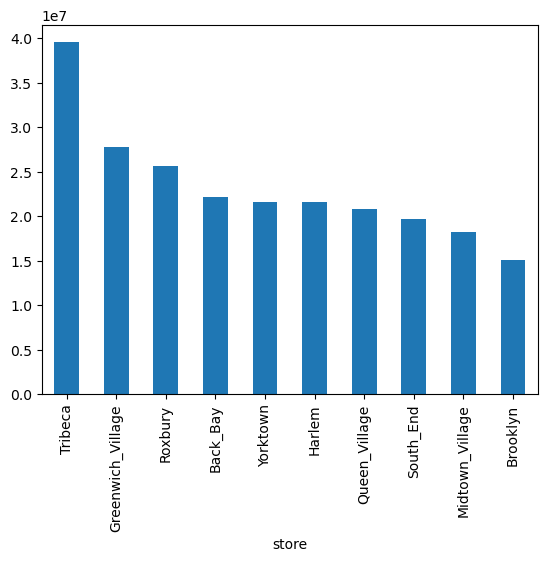

In [43]:
sales_per_store.plot(kind='bar')

In [45]:
#Segmentando por loja
nyc1 = df[df['store_code'] == 'NYC_1']
nyc2 = df[df['store_code'] == 'NYC_2']
nyc3 = df[df['store_code'] == 'NYC_3']
nyc4 = df[df['store_code'] == 'NYC_4']
bos1 = df[df['store_code'] == 'BOS_1']
bos2 = df[df['store_code'] == 'BOS_2']
bos3 = df[df['store_code'] == 'BOS_3']
phi1 = df[df['store_code'] == 'PHI_1']
phi2 = df[df['store_code'] == 'PHI_2']
phi3 = df[df['store_code'] == 'PHI_3']

In [47]:
#Agrupando por vendas diarias
df_nyc1 = nyc1.groupby('date')['total_sale'].sum()
df_nyc2 = nyc2.groupby('date')['total_sale'].sum()
df_nyc3 = nyc3.groupby('date')['total_sale'].sum()
df_nyc4 = nyc4.groupby('date')['total_sale'].sum()
df_bos1 = bos1.groupby('date')['total_sale'].sum()
df_bos2 = bos2.groupby('date')['total_sale'].sum()
df_bos3 = bos3.groupby('date')['total_sale'].sum()
df_phi1 = phi1.groupby('date')['total_sale'].sum()
df_phi2 = phi2.groupby('date')['total_sale'].sum()
df_phi3 = phi3.groupby('date')['total_sale'].sum()

In [49]:
#transofrmando em timeseries
ts_nyc1 = pd.Series(df_nyc1)
ts_nyc2 = pd.Series(df_nyc2)
ts_nyc3 = pd.Series(df_nyc3)
ts_nyc4 = pd.Series(df_nyc4)
ts_bos1 = pd.Series(df_bos1)
ts_bos2 = pd.Series(df_bos1)
ts_bos3 = pd.Series(df_bos3)
ts_phi1 = pd.Series(df_phi1)
ts_phi2 = pd.Series(df_phi2)
ts_phi3 = pd.Series(df_phi3)

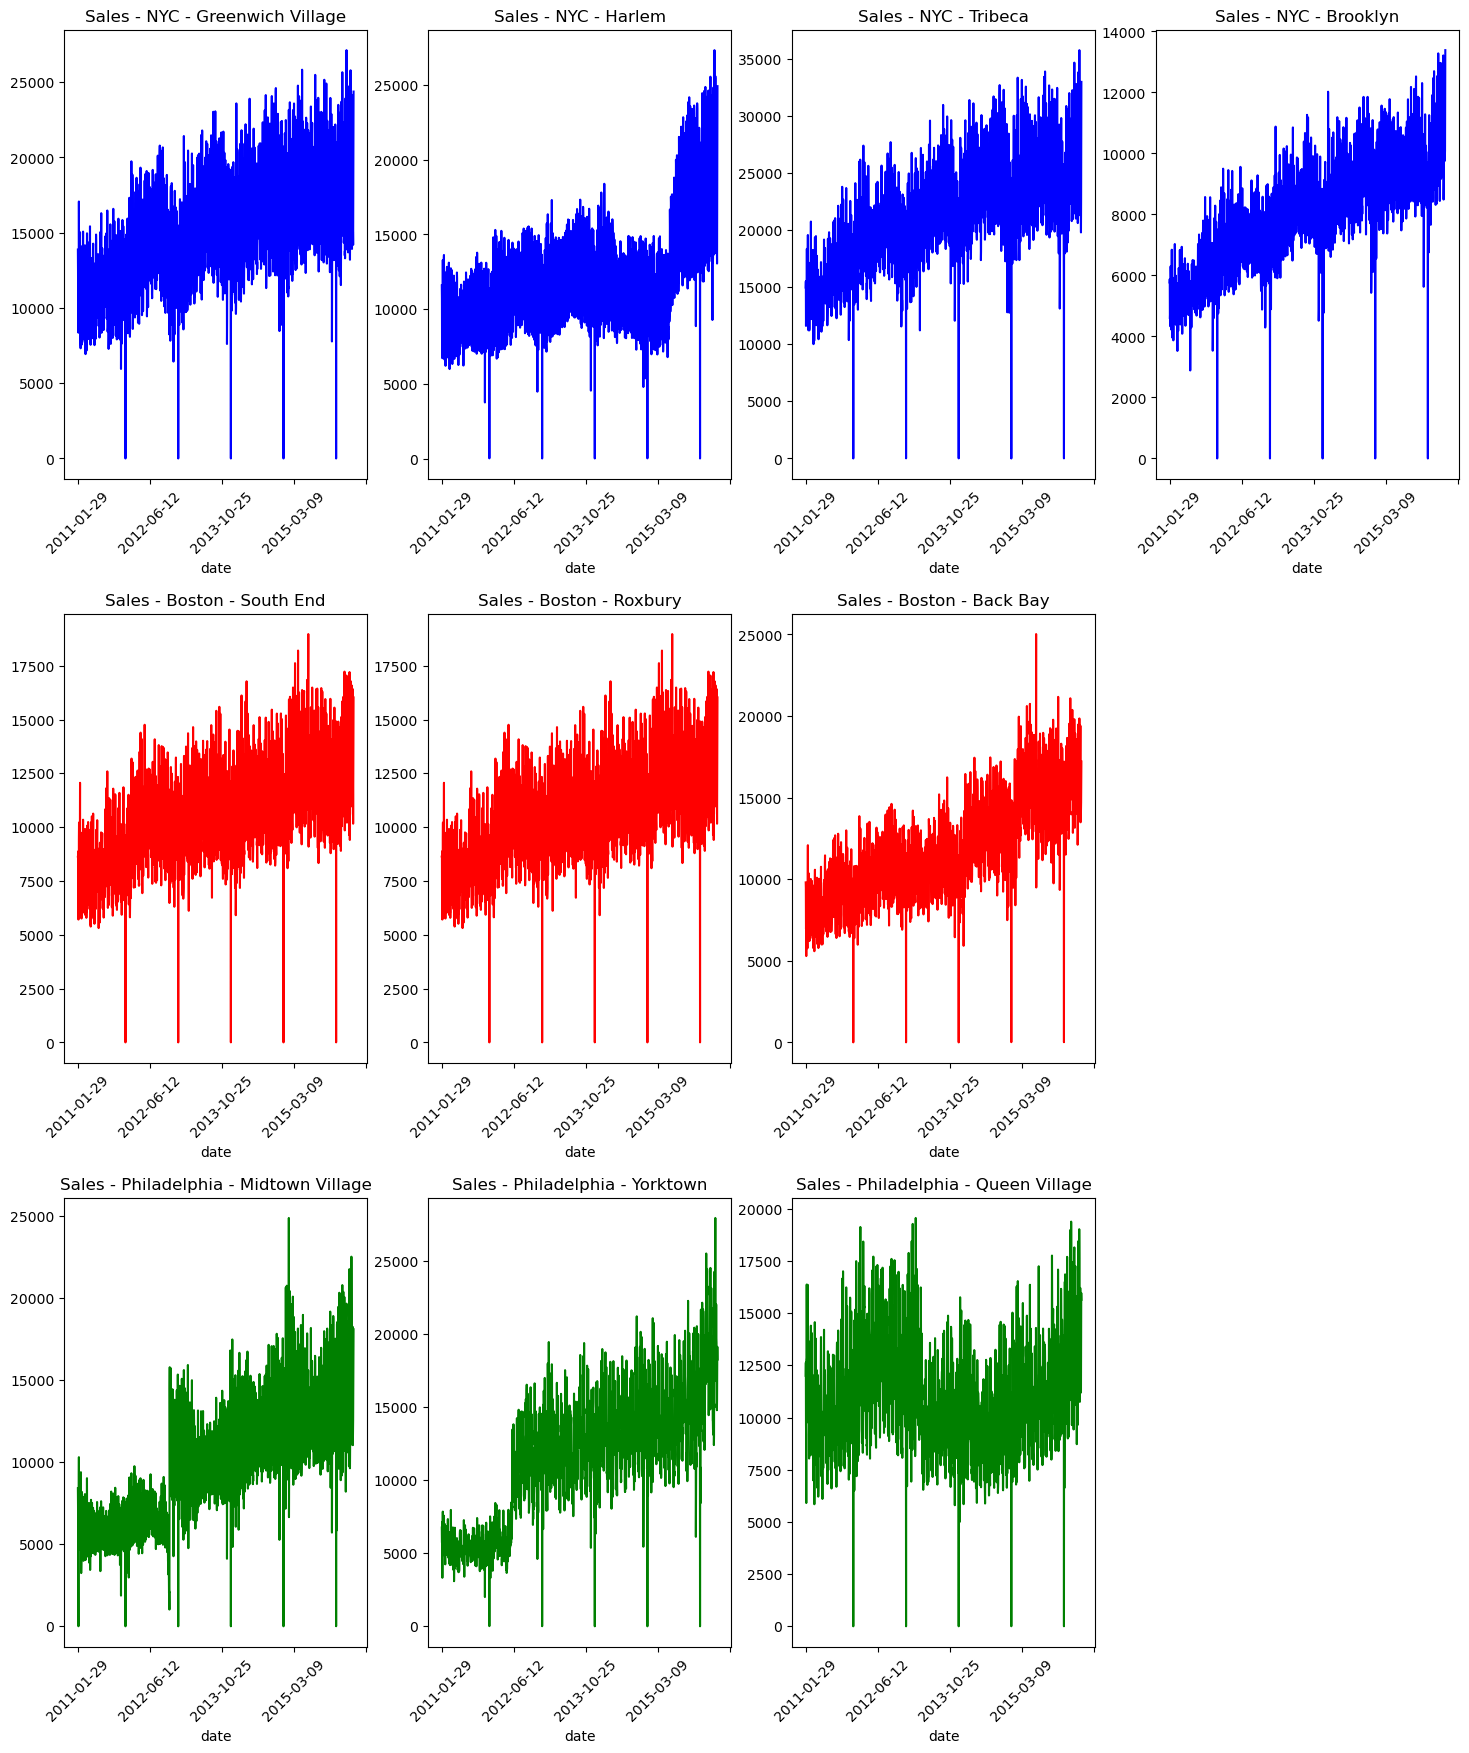

In [57]:
#plotando graficos das vendas de cada loja em cada cidade
fig, axs = plt.subplots(3, 4, figsize=(18, 21))
fig.subplots_adjust(hspace=0.3)
axs[1, 3].axis('off')
axs[2, 3].axis('off')

ts_nyc1.plot(ax=axs[0,0], color='blue')
axs[0,0].set_title('Sales - NYC - Greenwich Village')
axs[0,0].tick_params(axis='x', labelrotation=45)

ts_nyc2.plot(ax=axs[0,1], color='blue')
axs[0,1].set_title('Sales - NYC - Harlem')
axs[0,1].tick_params(axis='x', labelrotation=45)

ts_nyc3.plot(ax=axs[0,2], color='blue')
axs[0,2].set_title('Sales - NYC - Tribeca')
axs[0,2].tick_params(axis='x', labelrotation=45)

ts_nyc4.plot(ax=axs[0,3], color='blue')
axs[0,3].set_title('Sales - NYC - Brooklyn')
axs[0,3].tick_params(axis='x', labelrotation=45)

ts_bos1.plot(ax=axs[1,0], color='red')
axs[1,0].set_title('Sales - Boston - South End')
axs[1,0].tick_params(axis='x', labelrotation=45)

ts_bos2.plot(ax=axs[1,1], color='red')
axs[1,1].set_title('Sales - Boston - Roxbury')
axs[1,1].tick_params(axis='x', labelrotation=45)

ts_bos3.plot(ax=axs[1,2], color='red')
axs[1,2].set_title('Sales - Boston - Back Bay')
axs[1,2].tick_params(axis='x', labelrotation=45)

ts_phi1.plot(ax=axs[2,0], color='green')
axs[2,0].set_title('Sales - Philadelphia - Midtown Village')
axs[2,0].tick_params(axis='x', labelrotation=45)

ts_phi2.plot(ax=axs[2,1], color='green')
axs[2,1].set_title('Sales - Philadelphia - Yorktown')
axs[2,1].tick_params(axis='x', labelrotation=45)

ts_phi3.plot(ax=axs[2,2], color='green')
axs[2,2].set_title('Sales - Philadelphia - Queen Village')
axs[2,2].tick_params(axis='x', labelrotation=45)

Verificando a distribuiçao de itens, categorias e departamentos

In [68]:
dataframes = [nyc1, nyc2, nyc3, nyc4, bos1, bos2, bos3, phi1, phi2, phi3]
names = ['NYC - Greenwich Village', 'NYC - Harlem', 'NYC - Tribeca', 'NYC - Brooklyn', 'BOS - South End', 'BOS - Roxbury', 'BOS - Back Bay', 'PHI - Midtown Village', 'PHI - Yorktown', 'PHI - Queen Village']

<Figure size 1000x600 with 0 Axes>

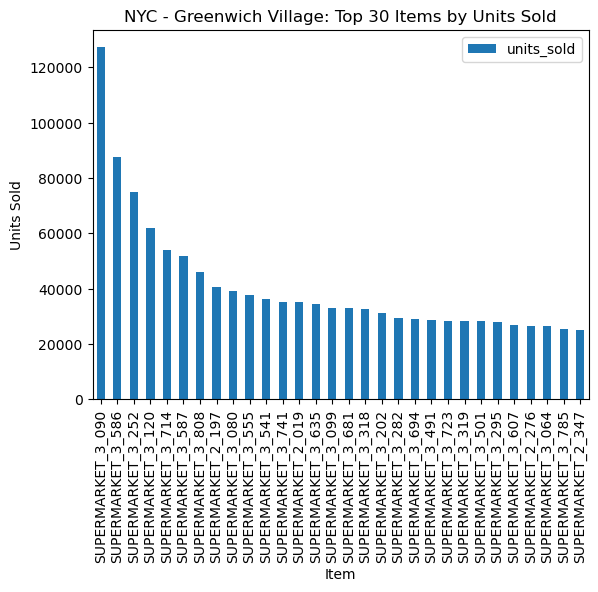

<Figure size 1000x600 with 0 Axes>

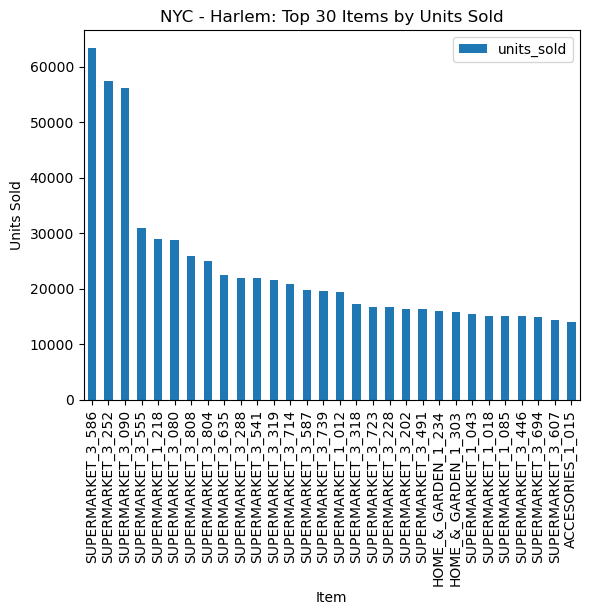

<Figure size 1000x600 with 0 Axes>

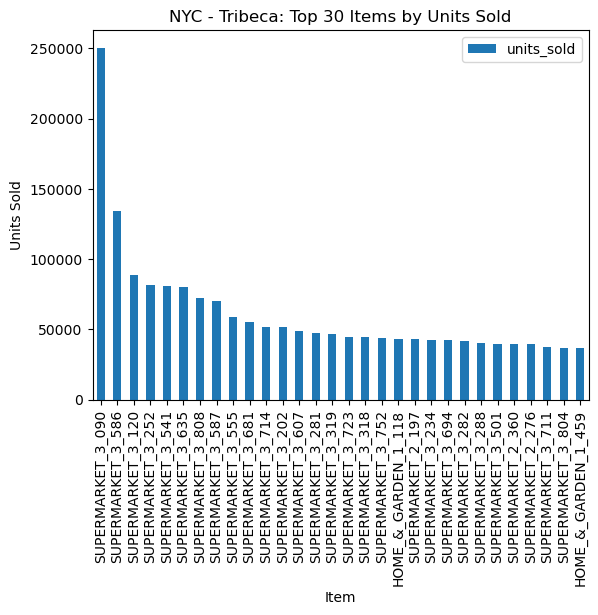

<Figure size 1000x600 with 0 Axes>

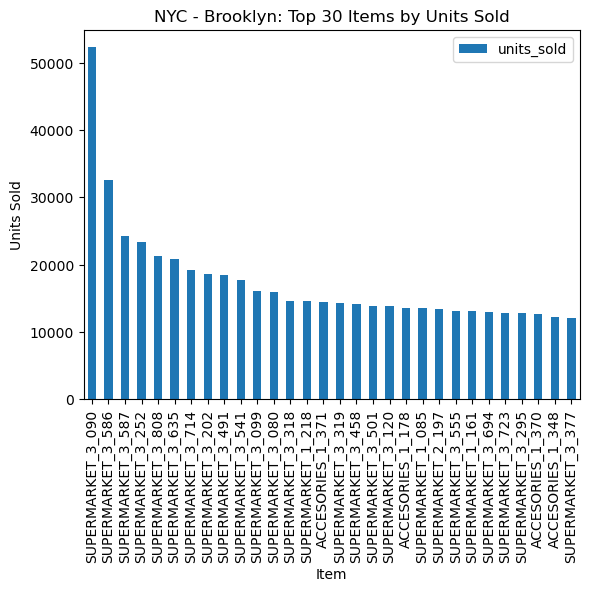

<Figure size 1000x600 with 0 Axes>

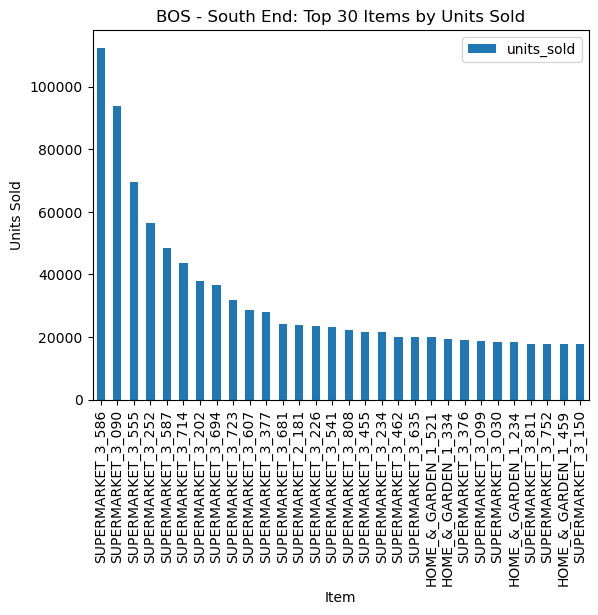

<Figure size 1000x600 with 0 Axes>

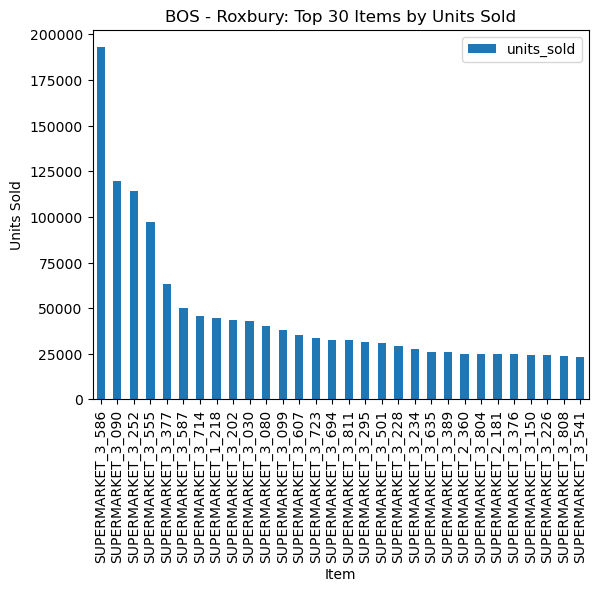

<Figure size 1000x600 with 0 Axes>

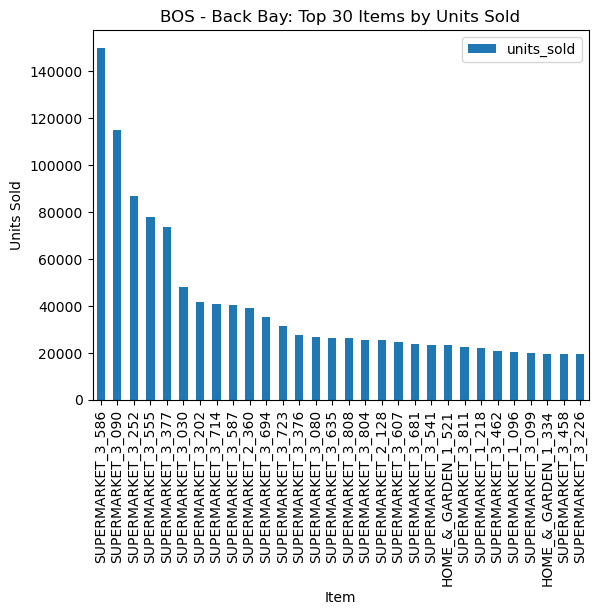

<Figure size 1000x600 with 0 Axes>

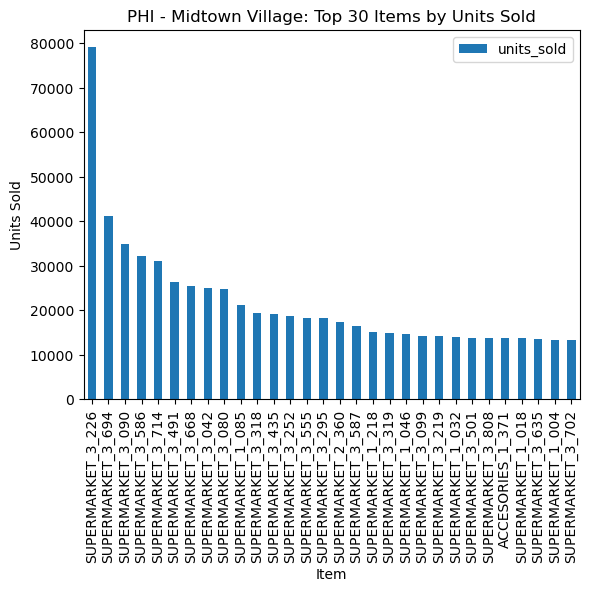

<Figure size 1000x600 with 0 Axes>

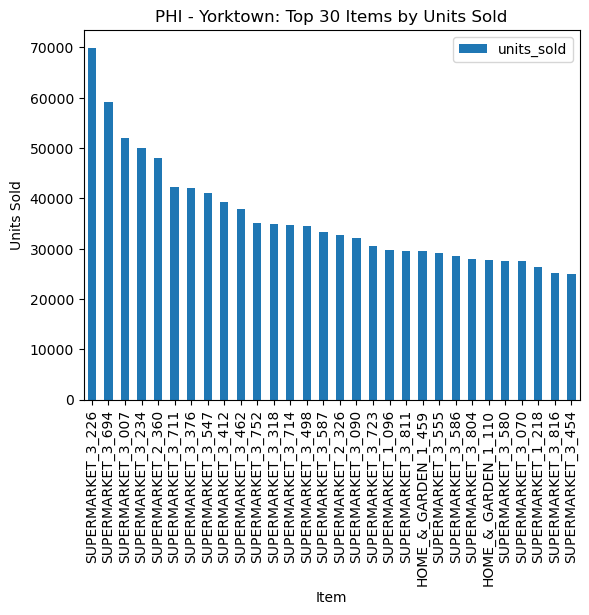

<Figure size 1000x600 with 0 Axes>

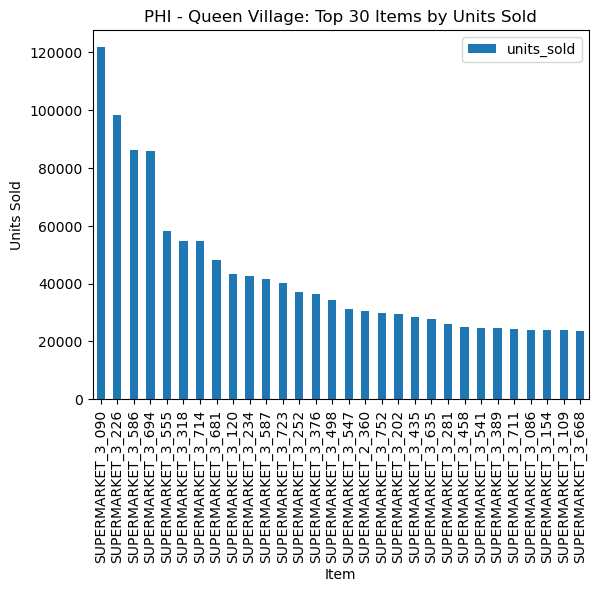

In [70]:
#30 itens mais vendidos por loja
for i in range(len(dataframes)):
    df = dataframes[i]
    name = names[i]
    grouped_df = df.groupby('item')[['units_sold']].sum()
    grouped_df = grouped_df.sort_values(by='units_sold', ascending=False)
    plt.figure(figsize=(10, 6))
    grouped_df.iloc[0:30,:].plot(kind='bar', title=f'{name}: Top 30 Items by Units Sold')
    plt.xlabel('Item')
    plt.ylabel('Units Sold')
    plt.show()

<Figure size 1000x600 with 0 Axes>

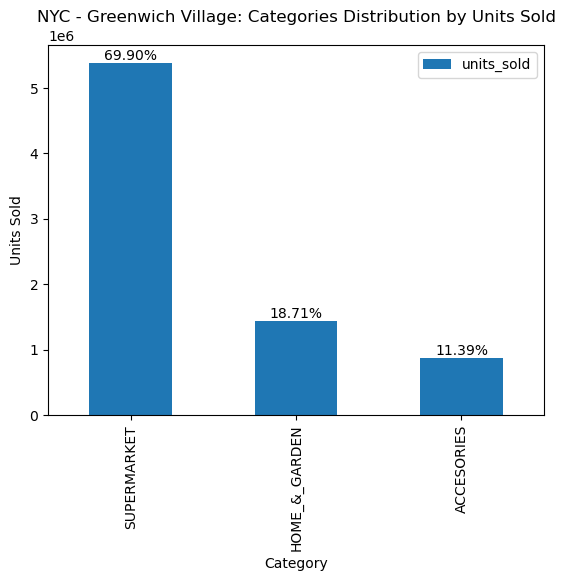

<Figure size 1000x600 with 0 Axes>

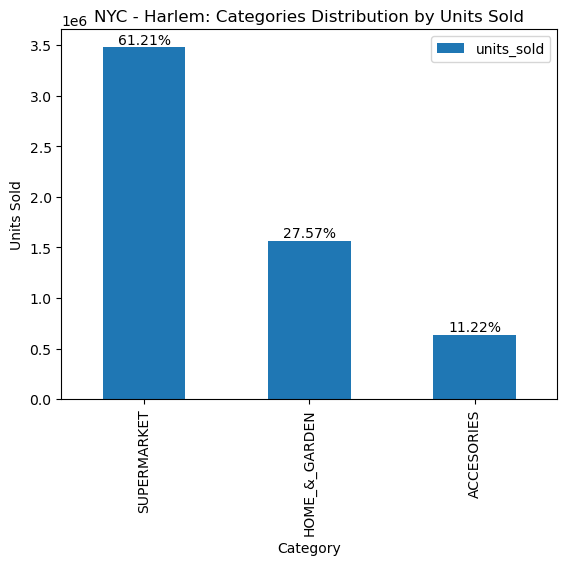

<Figure size 1000x600 with 0 Axes>

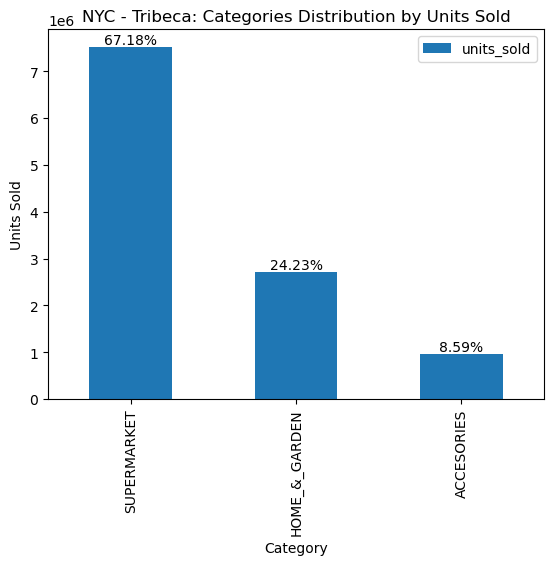

<Figure size 1000x600 with 0 Axes>

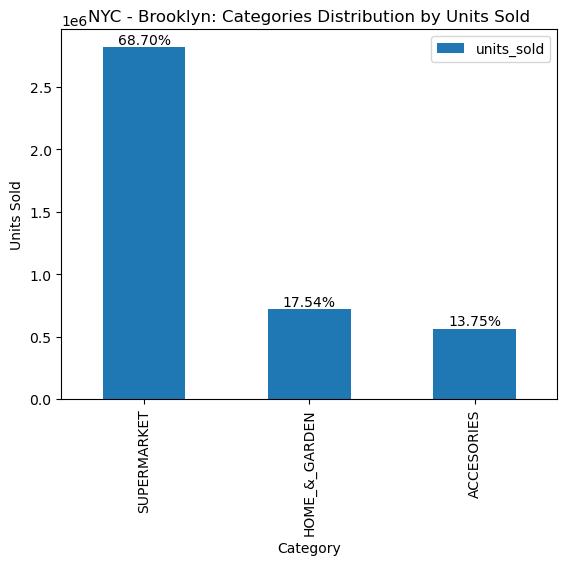

<Figure size 1000x600 with 0 Axes>

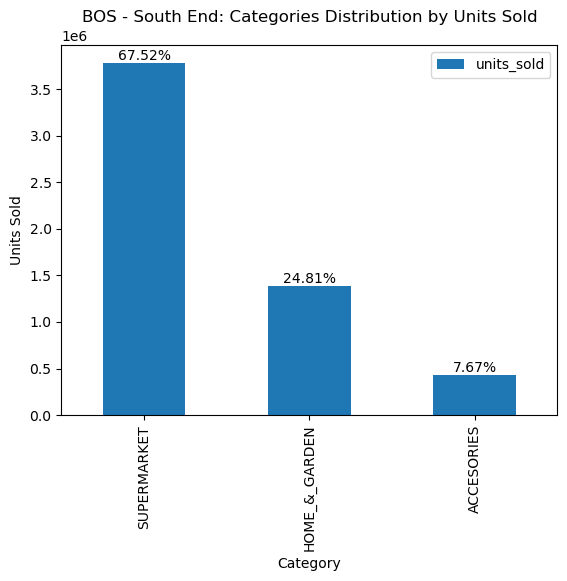

<Figure size 1000x600 with 0 Axes>

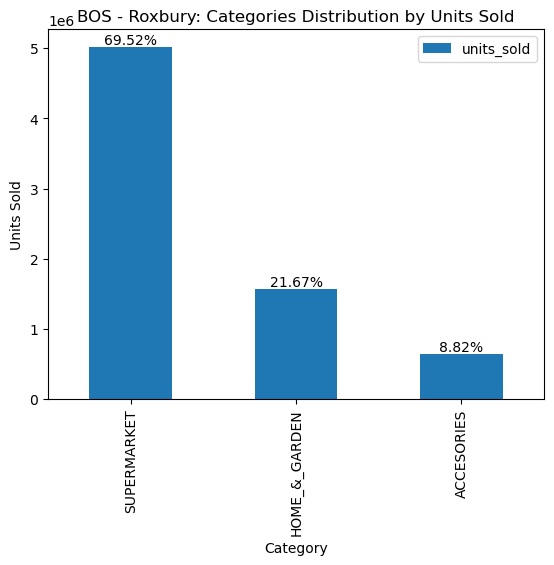

<Figure size 1000x600 with 0 Axes>

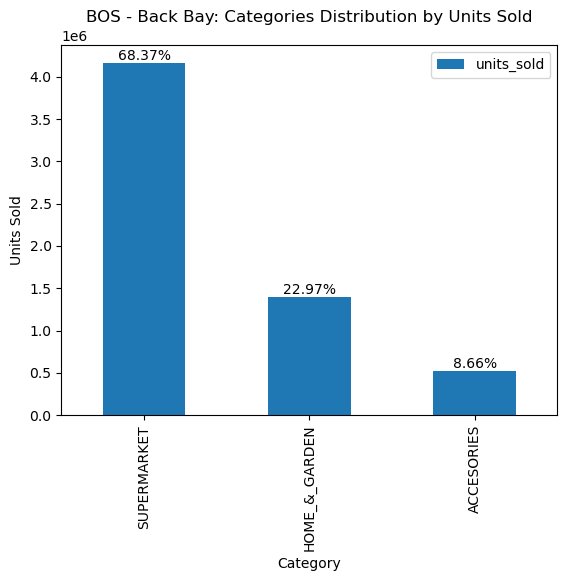

<Figure size 1000x600 with 0 Axes>

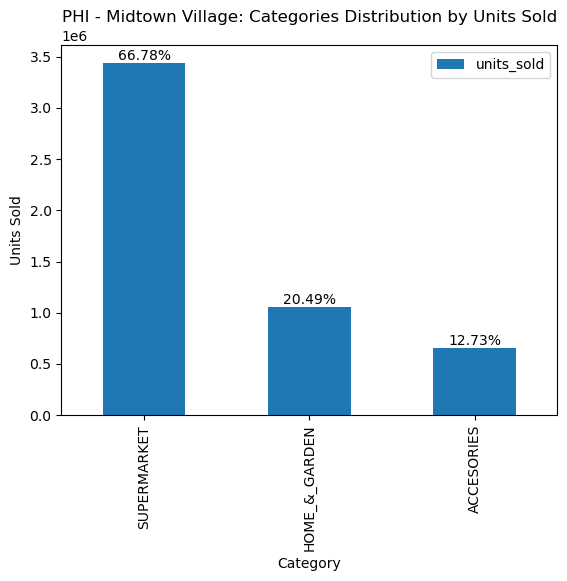

<Figure size 1000x600 with 0 Axes>

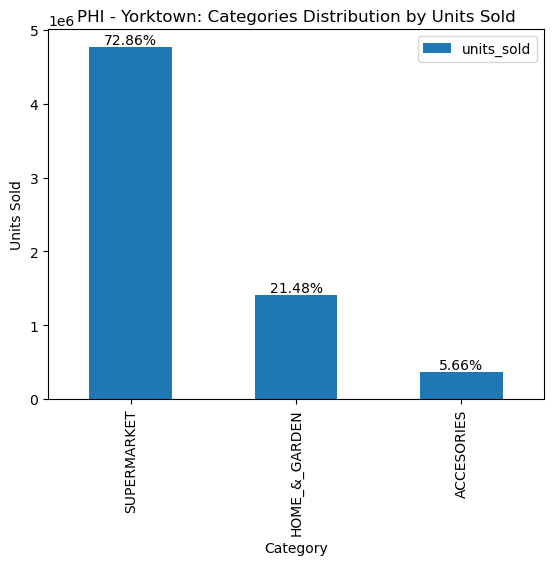

<Figure size 1000x600 with 0 Axes>

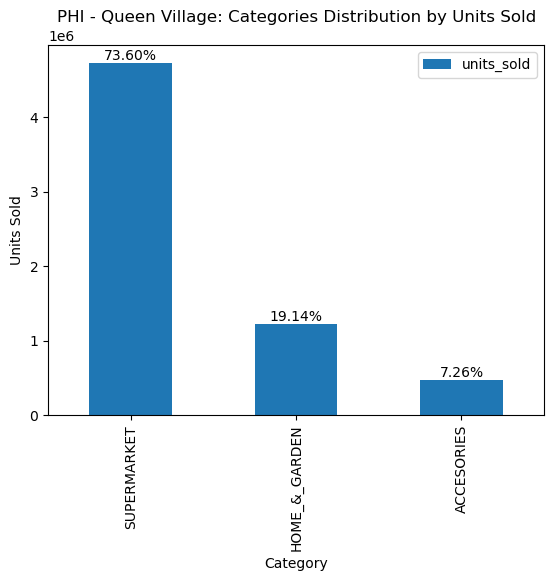

In [72]:
#distribuiçao por categoria por loja
for i in range(len(dataframes)):
    df = dataframes[i]
    name = names[i]
    grouped_df = df.groupby('category')[['units_sold']].sum()
    grouped_df = grouped_df.sort_values(by='units_sold', ascending=False)
    plt.figure(figsize=(10, 6))
    ax = grouped_df.plot(kind='bar', title=f'{name}: Categories Distribution by Units Sold')
    plt.xlabel('Category')
    plt.ylabel('Units Sold')


    for p in ax.patches:
        percentage = f"{p.get_height()/grouped_df['units_sold'].sum()*100:.2f}%"
        ax.annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
            
    plt.show()

<Figure size 1000x600 with 0 Axes>

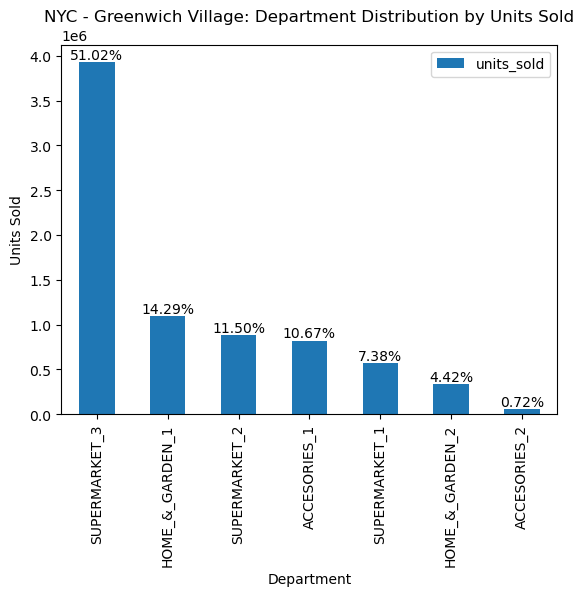

<Figure size 1000x600 with 0 Axes>

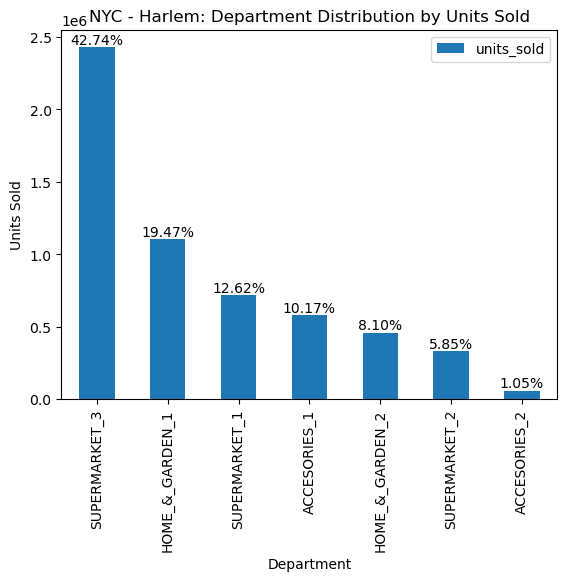

<Figure size 1000x600 with 0 Axes>

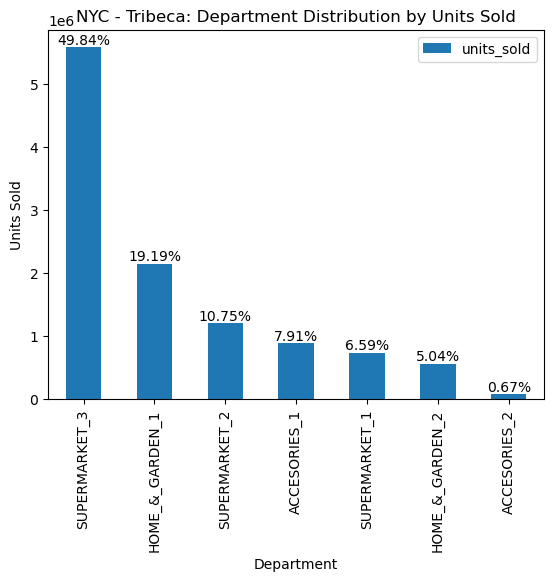

<Figure size 1000x600 with 0 Axes>

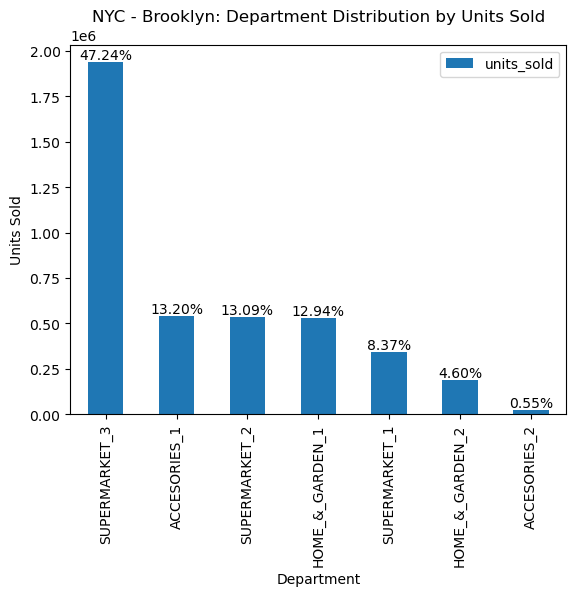

<Figure size 1000x600 with 0 Axes>

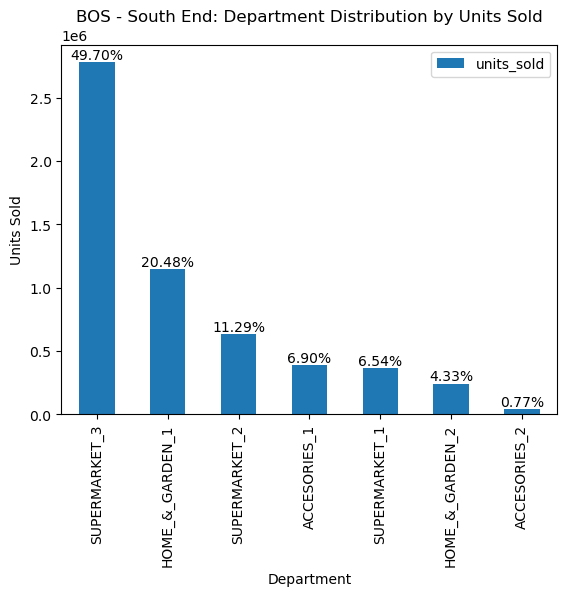

<Figure size 1000x600 with 0 Axes>

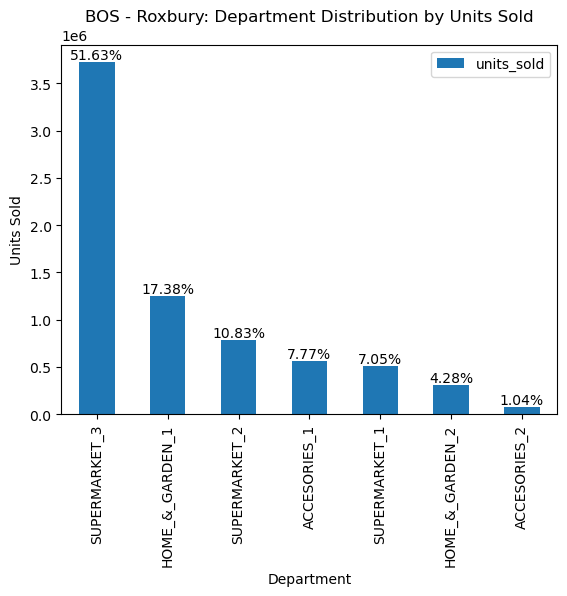

<Figure size 1000x600 with 0 Axes>

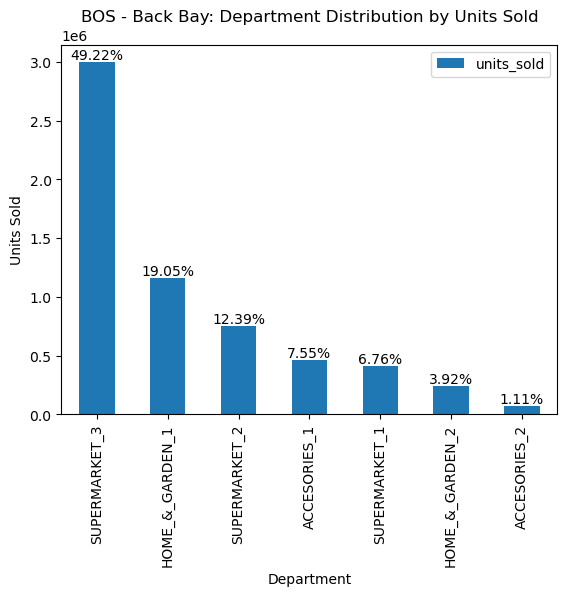

<Figure size 1000x600 with 0 Axes>

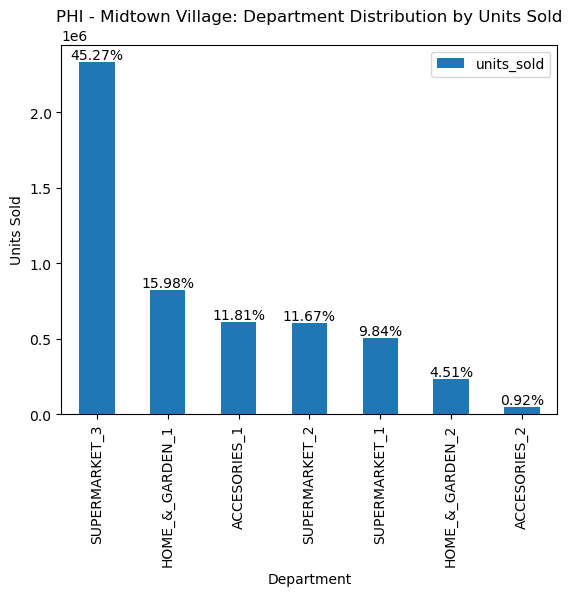

<Figure size 1000x600 with 0 Axes>

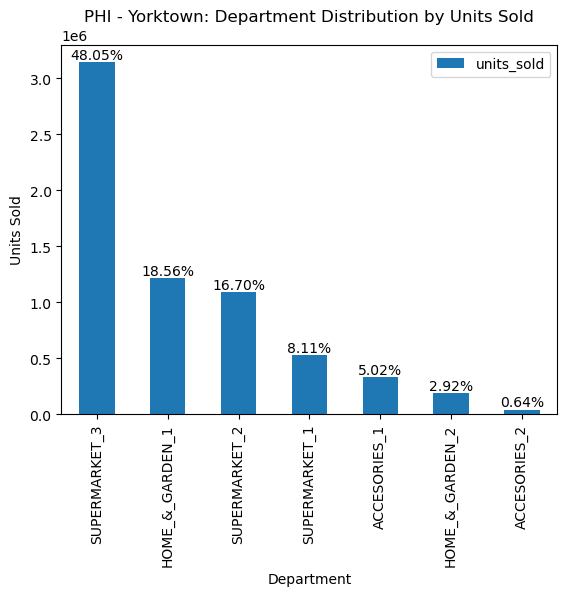

<Figure size 1000x600 with 0 Axes>

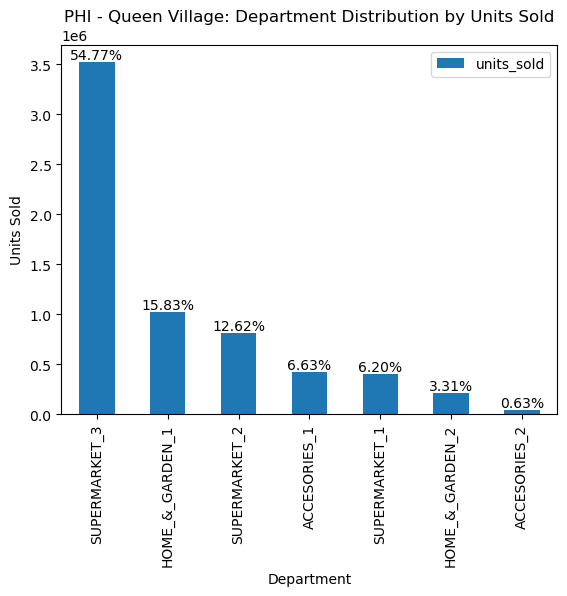

In [74]:
#distribuiçao por departamento por loja
for i in range(len(dataframes)):
    df = dataframes[i]
    name = names[i]
    grouped_df = df.groupby('department')[['units_sold']].sum()
    grouped_df = grouped_df.sort_values(by='units_sold', ascending=False)
    plt.figure(figsize=(10, 6))
    ax = grouped_df.plot(kind='bar', title=f'{name}: Department Distribution by Units Sold')
    plt.xlabel('Department')
    plt.ylabel('Units Sold')


    for p in ax.patches:
        percentage = f"{p.get_height()/grouped_df['units_sold'].sum()*100:.2f}%"
        ax.annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
        
            
    plt.show()


Fazendo abordagem por CIDADE

In [115]:
#Segmentando por cidade
nyc = df[(df['store_code'] == 'NYC_1') | (df['store_code'] == 'NYC_2') | (df['store_code'] == 'NYC_3') | (df['store_code'] == 'NYC_4')]
bos = df[(df['store_code'] == 'BOS_1') | (df['store_code'] == 'BOS_2') | (df['store_code'] == 'BOS_3')]
phi = df[(df['store_code'] == 'PHI_1') | (df['store_code'] == 'PHI_2') | (df['store_code'] == 'PHI_3')]

In [117]:
df_nyc = nyc.groupby('date')['total_sale'].sum()
df_bos = bos.groupby('date')['total_sale'].sum()
df_phi = phi.groupby('date')['total_sale'].sum()

In [119]:
ts_nyc = pd.Series(df_nyc)
ts_bos = pd.Series(df_bos)
ts_phi = pd.Series(df_phi)

Text(0.5, 1.0, 'Sales - PHI')

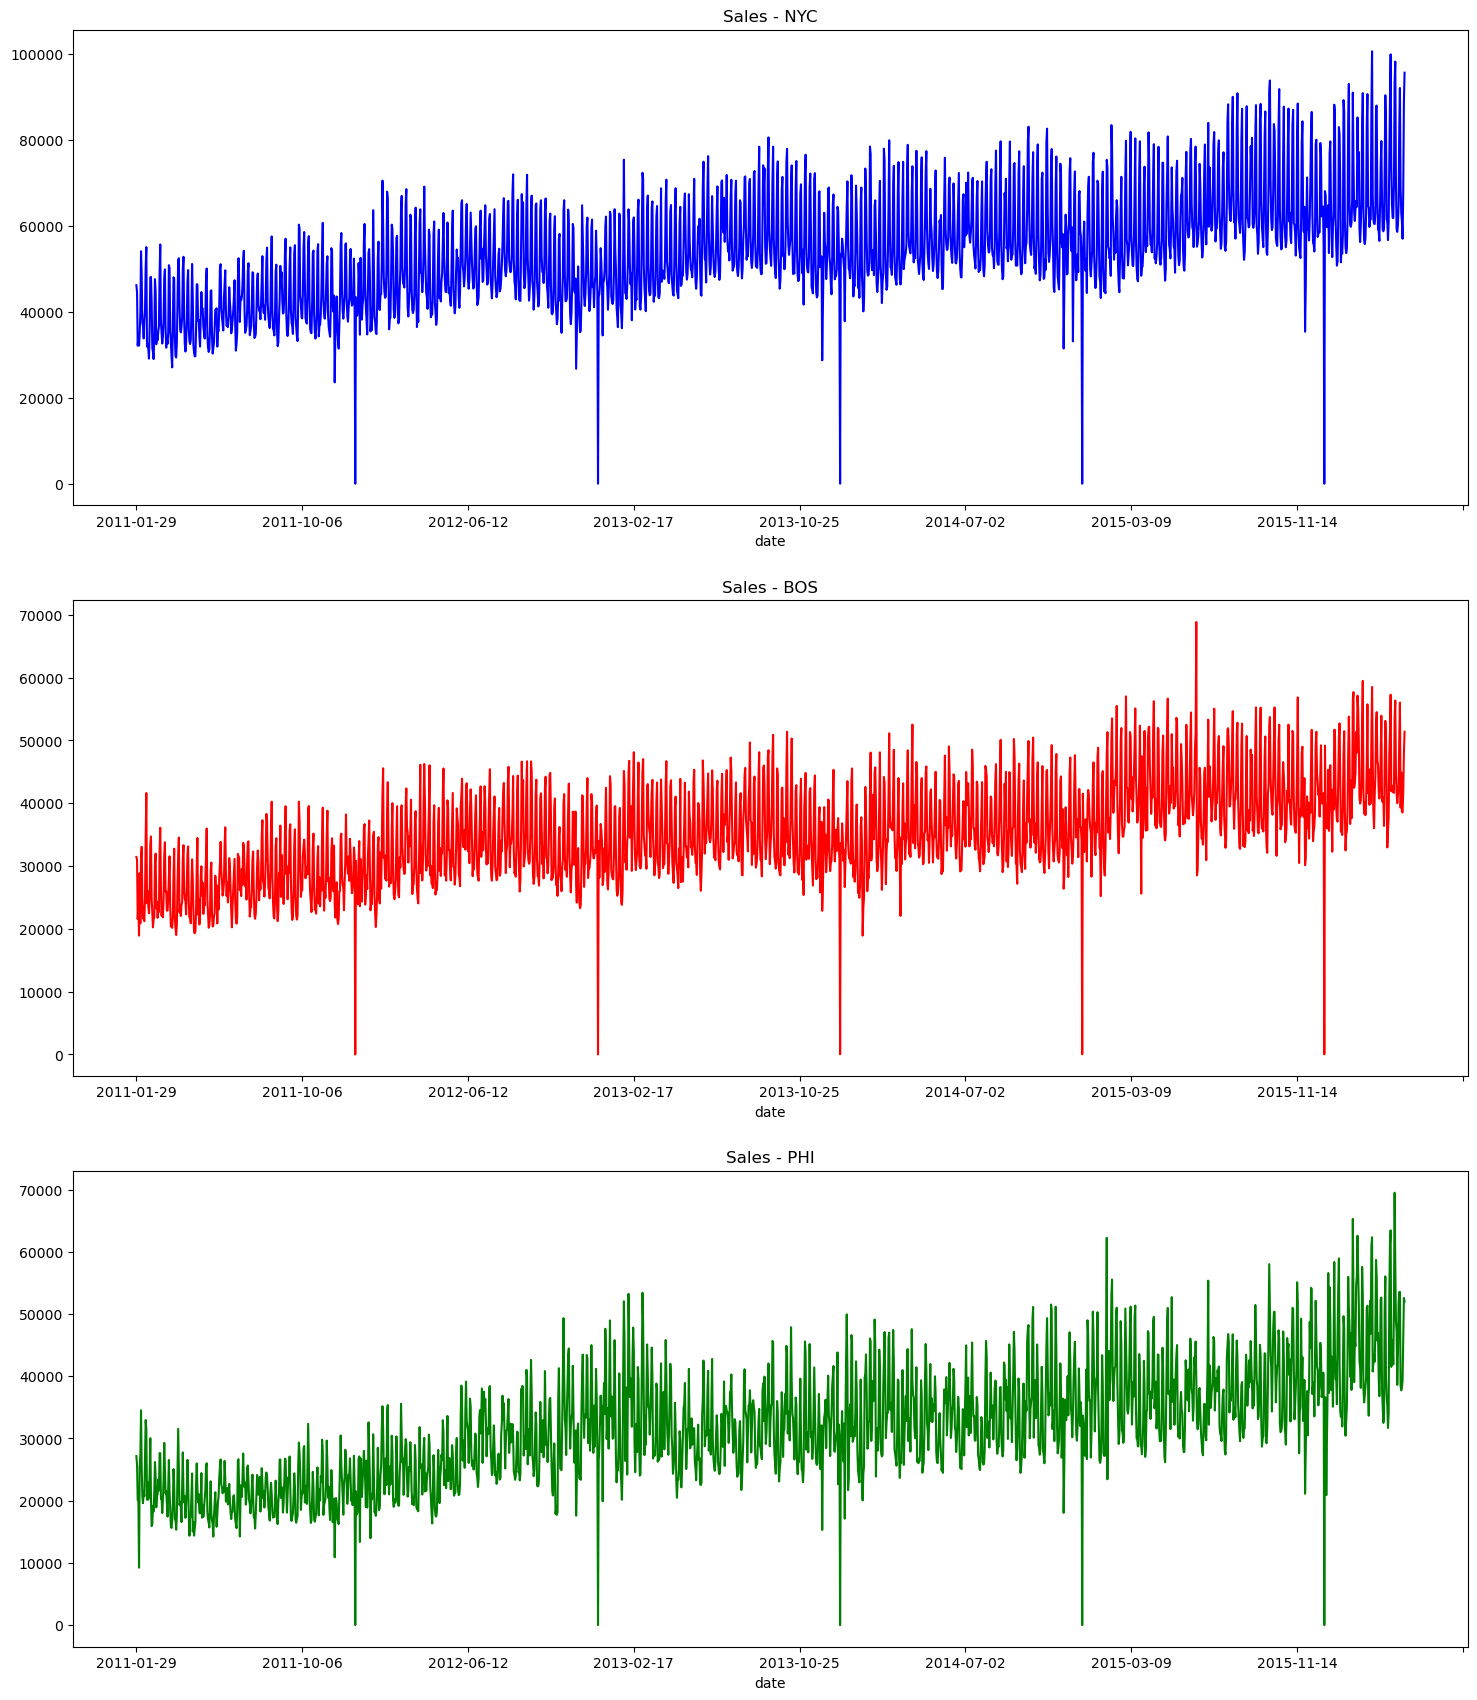

In [131]:
#plotando graficos das vendas em cada cidade
fig, axs = plt.subplots(3, 1, figsize=(18, 21))

ts_nyc.plot(ax=axs[0], color='blue')
axs[0].set_title('Sales - NYC')

ts_bos.plot(ax=axs[1], color='red')
axs[1].set_title('Sales - BOS')

ts_phi.plot(ax=axs[2], color='green')
axs[2].set_title('Sales - PHI')

In [137]:
dataframes_cidades = [nyc, bos, phi]
nomes = ['New York', 'Boston', 'Philadelphia']

<Figure size 1000x600 with 0 Axes>

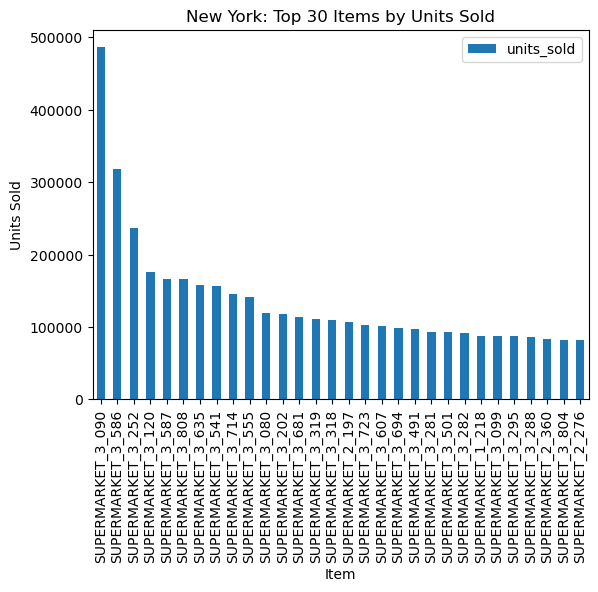

<Figure size 1000x600 with 0 Axes>

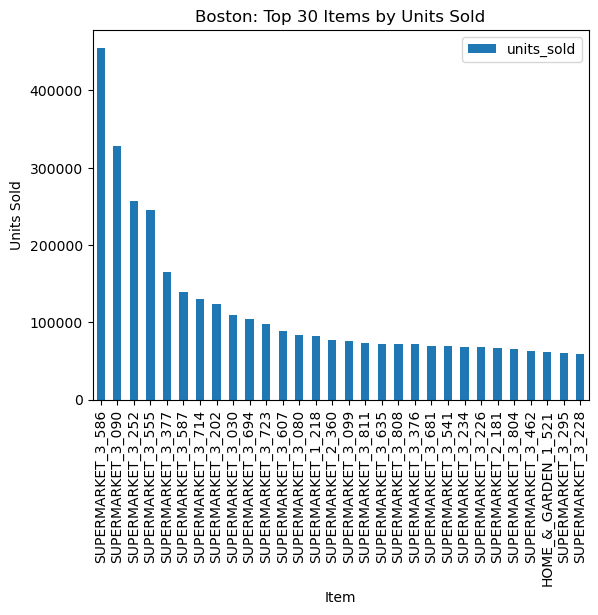

<Figure size 1000x600 with 0 Axes>

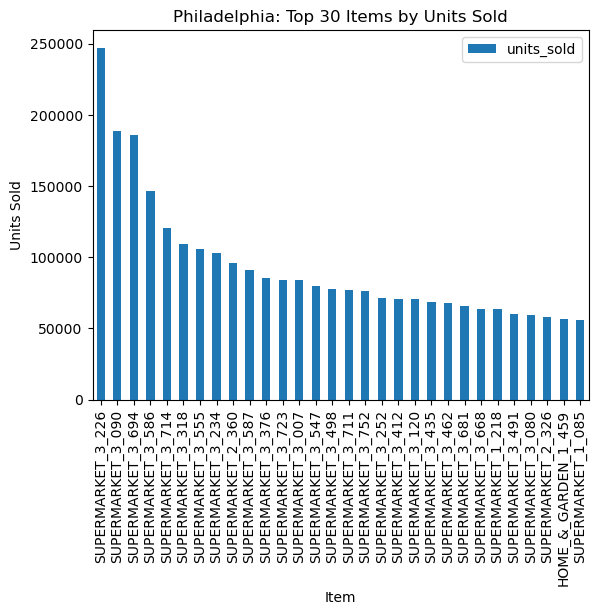

In [143]:
#30 itens mais vendidos por cidade
for i in range(len(dataframes_cidades)):
    df = dataframes_cidades[i]
    name = nomes[i]
    gp_df = df.groupby('item')[['units_sold']].sum()
    gp_df = gp_df.sort_values(by='units_sold', ascending=False)
    plt.figure(figsize=(10, 6))
    gp_df.iloc[0:30,:].plot(kind='bar', title=f'{name}: Top 30 Items by Units Sold')
    plt.xlabel('Item')
    plt.ylabel('Units Sold')
    plt.show()

<Figure size 1000x600 with 0 Axes>

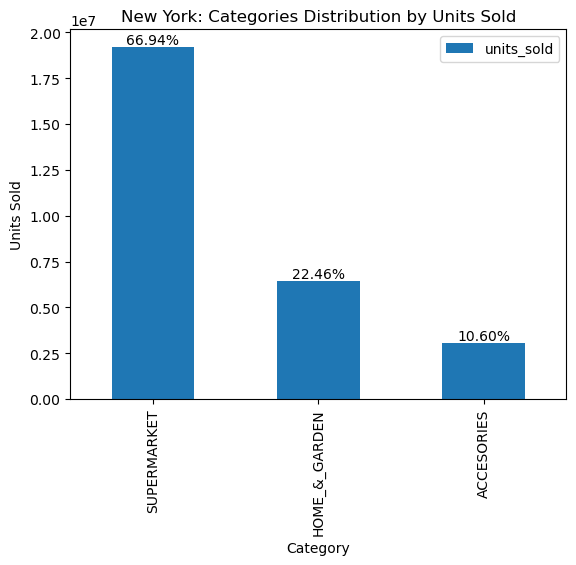

<Figure size 1000x600 with 0 Axes>

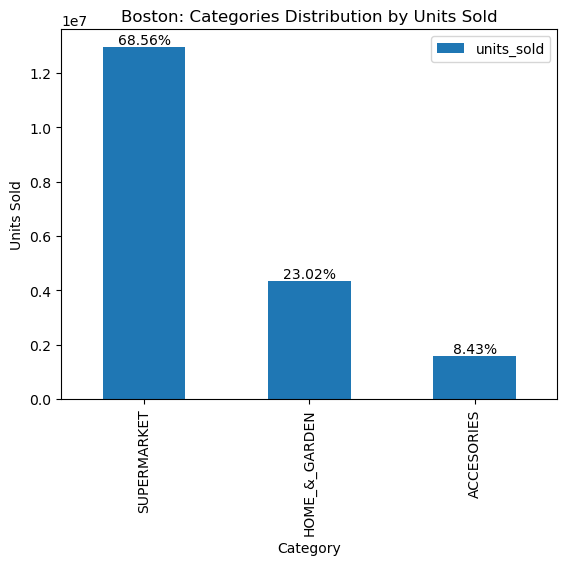

<Figure size 1000x600 with 0 Axes>

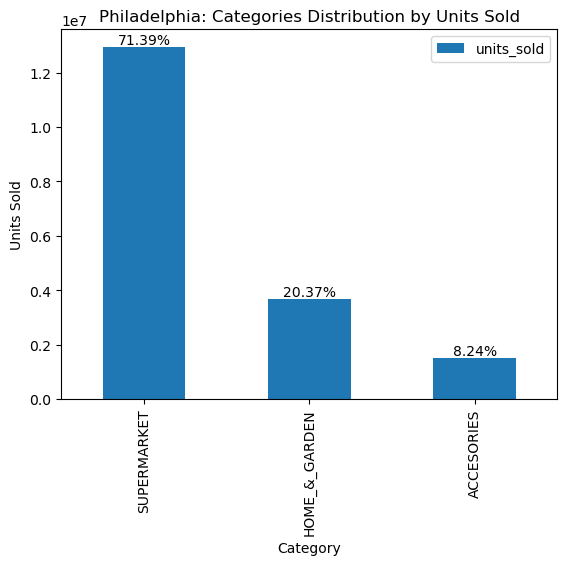

In [145]:
#distribuiçao por categoria por cidade
for i in range(len(dataframes_cidades)):
    df = dataframes_cidades[i]
    name = nomes[i]
    gp_df = df.groupby('category')[['units_sold']].sum()
    gp_df = gp_df.sort_values(by='units_sold', ascending=False)
    plt.figure(figsize=(10, 6))
    ax = gp_df.plot(kind='bar', title=f'{name}: Categories Distribution by Units Sold')
    plt.xlabel('Category')
    plt.ylabel('Units Sold')


    for p in ax.patches:
        percentage = f"{p.get_height()/gp_df['units_sold'].sum()*100:.2f}%"
        ax.annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
            
    plt.show()

<Figure size 1000x600 with 0 Axes>

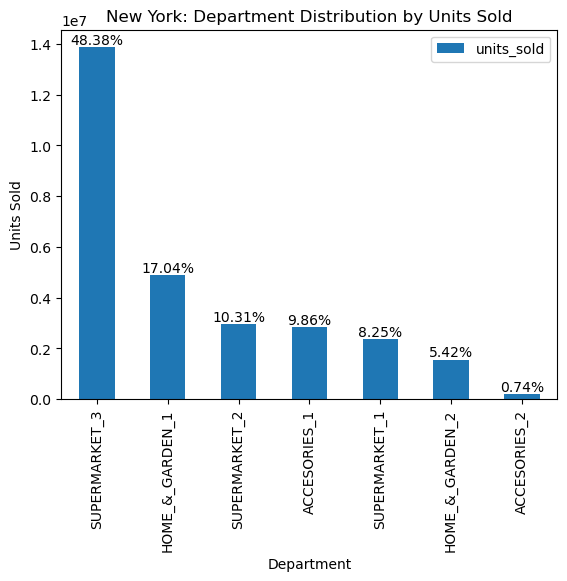

<Figure size 1000x600 with 0 Axes>

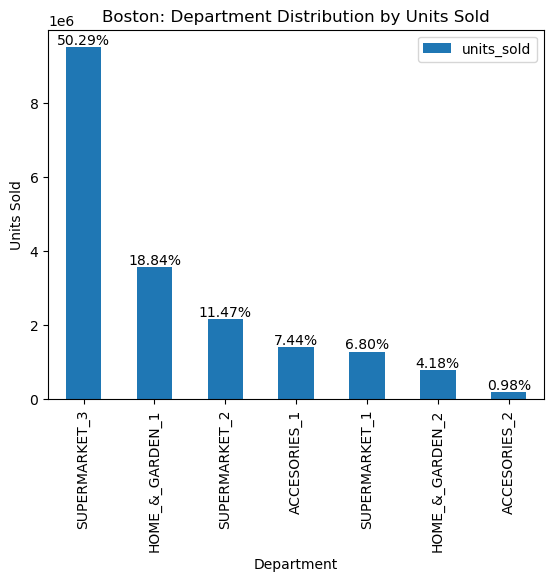

<Figure size 1000x600 with 0 Axes>

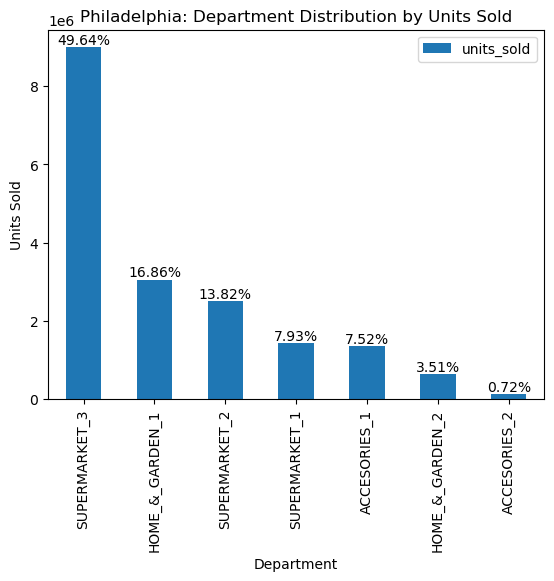

In [149]:
#distribuiçao por departamento por loja
for i in range(len(dataframes_cidades)):
    df = dataframes_cidades[i]
    name = nomes[i]
    gp_df = df.groupby('department')[['units_sold']].sum()
    gp_df = gp_df.sort_values(by='units_sold', ascending=False)
    plt.figure(figsize=(10, 6))
    ax = gp_df.plot(kind='bar', title=f'{name}: Department Distribution by Units Sold')
    plt.xlabel('Department')
    plt.ylabel('Units Sold')


    for p in ax.patches:
        percentage = f"{p.get_height()/gp_df['units_sold'].sum()*100:.2f}%"
        ax.annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
        
            
    plt.show()